In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [26]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import itertools

In [22]:
temp = npr.multivariate_normal([0.8,0.1,0.1],0.005*np.eye(3),size=10)
temp

array([[ 0.75108292, -0.00572985, -0.01261375],
       [ 0.8835384 ,  0.19091005,  0.06149455],
       [ 0.9140828 ,  0.03773797,  0.06786713],
       [ 0.82624856,  0.18299147,  0.06130813],
       [ 0.87319127,  0.00123385,  0.20870535],
       [ 0.79631258,  0.08389846,  0.06216236],
       [ 0.79573549,  0.09652194,  0.11564664],
       [ 0.80279823,  0.12884641, -0.072918  ],
       [ 0.72428747,  0.11396794,  0.0915672 ],
       [ 0.78460422, -0.02344902,  0.10056661]])

In [23]:
temp2 = abs(temp) * (1/np.sum(abs(temp),axis=1))[:,np.newaxis]

In [24]:
temp2

array([[0.97615939, 0.00744691, 0.0163937 ],
       [0.7778017 , 0.16806305, 0.05413524],
       [0.89643391, 0.03700933, 0.06655676],
       [0.77179952, 0.1709325 , 0.05726798],
       [0.80617367, 0.00113915, 0.19268717],
       [0.84500749, 0.08902889, 0.06596361],
       [0.78949527, 0.09576501, 0.11473973],
       [0.79915199, 0.1282612 , 0.07258682],
       [0.77895231, 0.12256955, 0.09847814],
       [0.86351209, 0.02580729, 0.11068062]])

In [34]:
all_perm=np.array((list(itertools.permutations(list(range(3))))))
b=all_perm[np.random.randint(0,6,size=10)]
temp3 = (temp2.flatten()[(b+3*np.arange(10)[...,np.newaxis]).flatten()]).reshape(temp2.shape)

In [35]:
temp3

array([[0.00744691, 0.0163937 , 0.97615939],
       [0.05413524, 0.7778017 , 0.16806305],
       [0.89643391, 0.03700933, 0.06655676],
       [0.77179952, 0.05726798, 0.1709325 ],
       [0.80617367, 0.19268717, 0.00113915],
       [0.06596361, 0.84500749, 0.08902889],
       [0.09576501, 0.78949527, 0.11473973],
       [0.07258682, 0.1282612 , 0.79915199],
       [0.77895231, 0.09847814, 0.12256955],
       [0.02580729, 0.86351209, 0.11068062]])

In [36]:
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans

In [37]:
from resource_environment import Bandit_Resource_Environment

In [62]:
env = Bandit_Resource_Environment(num_users=10)

In [63]:
X = env.user_prefs

In [64]:
n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
# ipca = PCA(n_components=n_components)
X_ipca = ipca.fit_transform(X)

In [65]:
y_pred = KMeans(n_clusters=3, random_state=170).fit_predict(X_ipca)

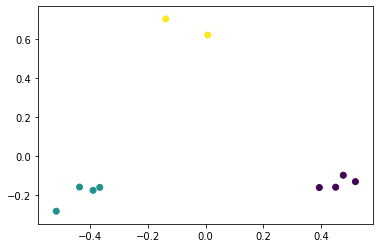

In [66]:
plt.scatter(X_ipca[:, 0], X_ipca[:, 1], c=y_pred)
plt.show()

In [67]:
cntxts = env.user_context

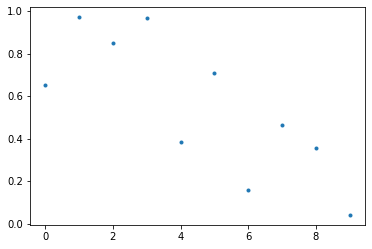

In [68]:
plt.plot(cntxts,'.')
plt.show()

In [69]:
cntxts

array([0.65468811, 0.9715553 , 0.84849531, 0.96686843, 0.38661238,
       0.71066369, 0.16062362, 0.46474363, 0.35869857, 0.0424266 ])

In [70]:
X[cntxts<0.3333]

array([[0.80201199, 0.07154175, 0.12644626],
       [0.723963  , 0.20746133, 0.06857567]])

In [71]:
X[(cntxts>0.333333)&(cntxts<0.666666)]

array([[0.05689128, 0.80005007, 0.14305864],
       [0.07485897, 0.84110555, 0.08403548],
       [0.10467475, 0.79882091, 0.09650433],
       [0.05989345, 0.75865815, 0.1814484 ]])

In [72]:
X[(cntxts>0.666666)]

array([[0.03186193, 0.12442882, 0.84370925],
       [0.11926196, 0.19475932, 0.68597872],
       [0.10891083, 0.18263828, 0.70845089],
       [0.12609663, 0.14226422, 0.73163915]])